# Bell State
In this code we create a Bell state and then measure it in both a simulator and a real quantum device

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.tools.monitor import *
from qiskit.visualization import *
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


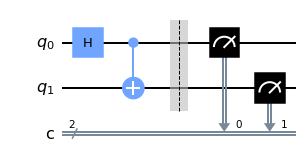

In [2]:
# First we create the quantum and classical registers for our circuit
qr = QuantumRegister(2, name = 'q')
cr = ClassicalRegister(2, name = 'c')
circ = QuantumCircuit(qr,cr)

# Now we apply the operations that result in a Bell state and measure it
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.barrier()
circ.measure(qr, cr)

circ.draw(output = 'mpl')

{'00': 530, '11': 494}


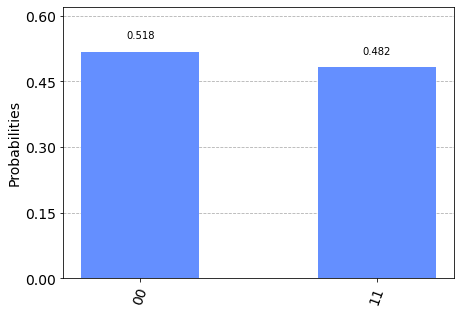

In [3]:
# First we execute the circuit using a simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots = 1024)
res_sim = job_sim.result()
counts_sim = res_sim.get_counts(circ)

print(counts_sim)
plot_histogram(counts_sim)

Executing on: ibmq_athens
Job Status: job has successfully run
{'00': 495, '01': 10, '10': 17, '11': 502}


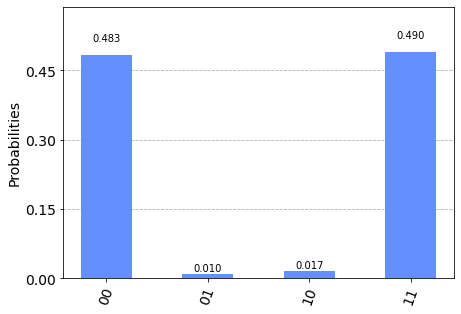

In [4]:
# Now we run it on a real IBM quantum computer
backend = least_busy(provider.backends(operational = True, simulator = False, status_msg = 'active',
                            filters = lambda x: x.configuration().n_qubits >= 2))
print('Executing on:', backend)
job_real = execute(circ, backend, shots = 1024)
job_monitor(job_real)

res_real = job_real.result()
counts_real = res_real.get_counts(circ)

print(counts_real)
plot_histogram(counts_real)

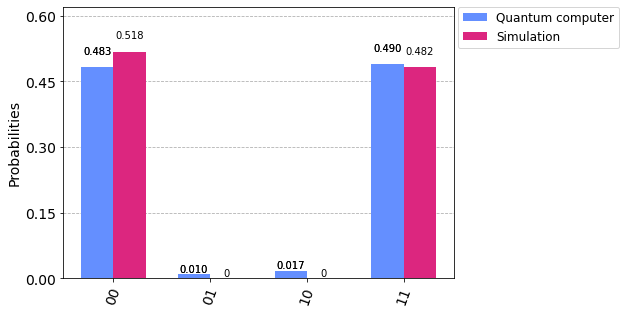

In [5]:
# For the sake of comparison we plot both histograms together
plot_histogram([counts_real, counts_sim], legend = ['Quantum computer', 'Simulation'])